In [16]:
#https://www.datacamp.com/community/tutorials/machine-learning-python#gs.jANmeU8

#This is an example of supervised machine learning.
#we are going to work on the digits dataset available with scikit-learn.

#importing numpy 
import numpy as np
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()

# Print the `digits` data 
print(digits)






{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [17]:
#Exploring the data-gathering basic information about your data might lead to some insight.
# Get the keys of the `digits` data
print(digits.keys())

# Print out the data
print(digits.data)

# Print out the target values
print(digits.target)

# Print out the description of the `digits` data
print(digits.DESCR)

dict_keys(['DESCR', 'images', 'target', 'data', 'target_names'])
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmap

In [18]:
# Isolate the `digits` data
digits_data = digits.data

# Inspect the shape
print("shape of digits numpy array",digits_data.shape)

# Isolate the target values with `target`
digits_target = digits.target

# Inspect the shape
print("shape of the target",digits_target.shape)

# Print the number of unique labels
number_digits = len(np.unique(digits.target))
print("Number of unique labels",number_digits)

# Isolate the `images`
digits_images = digits.images

# Inspect the shape
print("shape of the images data",digits_images.shape)

shape of digits numpy array (1797, 64)
shape of the target (1797,)
Number of unique labels 10
shape of the images data (1797, 8, 8)


In [15]:
'''
By inspecting the digits data you see there are 1797 samples with 64 features. 
As we have 1797 samples, the target value is also 1797.
But all those target values contain only 10 unique values.
Lastly, we see that images data is a 3 dimensional data. There are 1797 instances that 8 by 8 pixels.
'''



'\nBy inspecting the digits data you see there are 1797 samples with 64 features. \nAs we have 1797 samples, the target value is also 1797.\nBut all those target values contain only 10 unique values.\nLastly, we see that images data is a 3 dimensional data. There are 1797 instances that 8 by 8 pixels.\n'

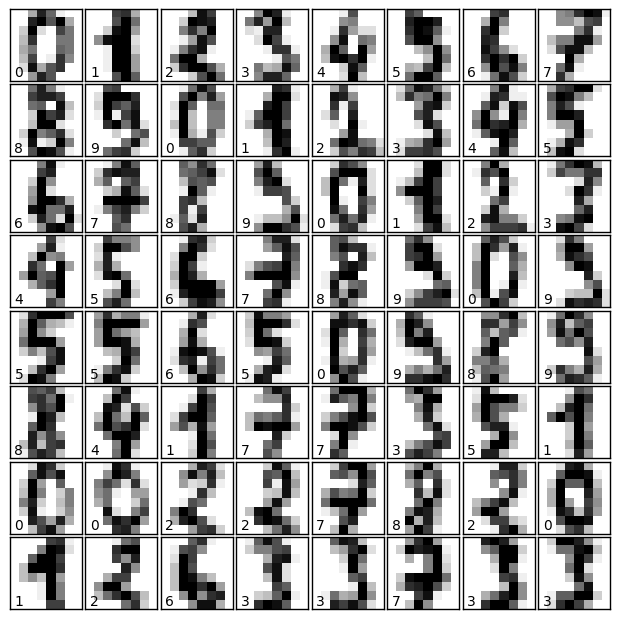

In [19]:
#Visualize your data images with matplotlib

#import matplotlib
import matplotlib.pyplot as plt

#figure size(width,height) in inches
fig=plt.figure(figsize=(6,6))

#Adjust the subplots
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

#For each of the 64 images
for i in range(64):
    #intialize the subplots:Add a subplot in the grid of 8 by 8 ,at the i+1 th position
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    #Display an image at the i-th position
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    #label the image with the target value
    ax.text(0,7,str(digits.target[i]))
    
#show the plot
plt.show()

In [27]:
#Principal Component Analysis: It is a dimensionality reduction technique.
#The idea in PCA is to find a linear combination of two variables which contain most of the information.
#This new variable or "principal component" can replace the two original variables.
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA

#create a randomized PCA model that takes two components
randomized_pca= RandomizedPCA(n_components=2)

#Fit and transform the data to the model
reduced_data_rpca=randomized_pca.fit_transform(digits.data)

#create a regular pca model
pca=PCA(n_components=2)

#Fit and transform the data to the model
reduced_data_pca=pca.fit_transform(digits.data)

#inspect the shape
print("shape of the reduced data ",reduced_data_pca.shape)

#print out the data
print("randomized pca model:\n",reduced_data_rpca)
print("\n")
print("regular pca model:\n",reduced_data_pca)


shape of the reduced data  (1797, 2)
randomized pca model:
 [[ -1.25844529  21.27470348]
 [  7.95815701 -20.76647918]
 [  6.99128867  -9.9565987 ]
 ..., 
 [ 10.80172923  -6.96088842]
 [ -4.86874644  12.42558734]
 [ -0.34494302   6.36229148]]


regular pca model:
 [[  1.25946645 -21.27488348]
 [ -7.9576113   20.76869896]
 [ -6.99192297   9.95598641]
 ..., 
 [-10.8012837    6.96025223]
 [  4.87210009 -12.42395362]
 [  0.34438963  -6.36554919]]


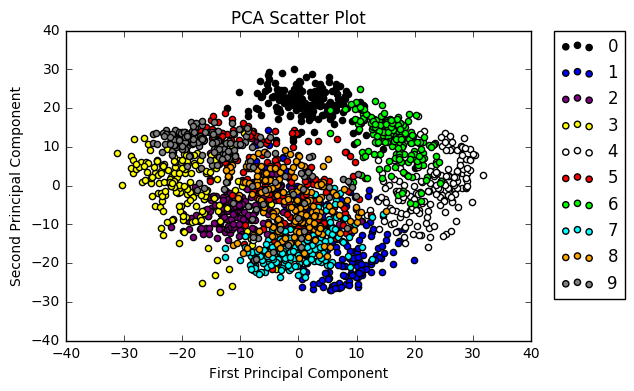

In [28]:
#Now we build a scatterplot to visualize the data
colors=['black','blue','purple','yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()
    

In [30]:
#Preprocessing your data

#Data normalization
# Import
from sklearn.preprocessing import scale

# Apply `scale()` to the `digits` data
data = scale(digits.data)
#By scaling the data, we shift the distribution of each attribute to have a mean of 0 and a standard deviation of 1 i.e unit variance
print("scaled data\n",data)


scaled data
 [[ 0.         -0.33501649 -0.04308102 ..., -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  1.56568555  1.6951369
  -0.19600752]
 ..., 
 [ 0.         -0.33501649 -0.88456568 ..., -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...,  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...,  0.8876023  -0.26113572
  -0.19600752]]


In [32]:
#Splitting the data into training and test set

# Import `train_test_split`
from sklearn.cross_validation import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

#inspecting the numbers
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print("No of samples in training data :",n_samples)

# Print out `n_features`
print("No. of features in training data :",n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))
print("No. of training labels :",n_digits)

# Inspect `y_train`
print(len(y_train))


No of samples in training data : 1347
No. of features in training data : 64
No. of training labels : 10
1347


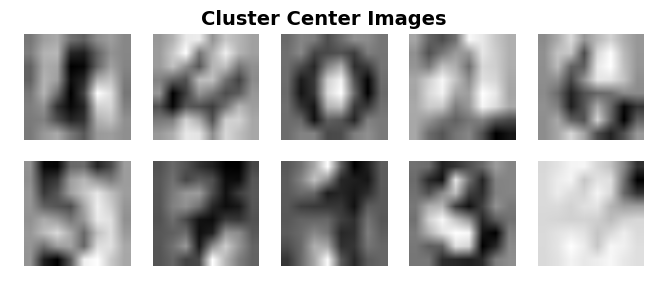

In [33]:
#Clustering the digits data

# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data `X_train`to the model
clf.fit(X_train)

# Import matplotlib
import matplotlib.pyplot as plt

# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()